In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [3]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
print(X.shape, y)

(70000, 784) ['5' '0' '4' ... '4' '5' '6']


In [6]:
print(y.shape, X[0, :])

(70000,) [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_train_crossval, y_train, y_train_crossval = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print(X_train_crossval.shape[0])
print(X_train.shape[0])
print(X_test.shape[0])

5600
50400
14000


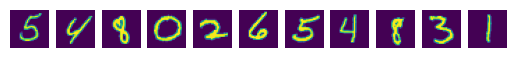

In [29]:
for i in range(10):
    plt.subplot(1,10,i+1)  
    plt.axis('off')
    plt.imshow(np.reshape(X_train[i], (28,28)))

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [26]:
def Logistic_Regression(x_train_crossvalid, y_train_crossvalid, x_train, y_train, x_test, y_test):
    hyperParameters = {
        'penalty':['l1','l2'],
        'tol':[0.01, 0.1, 1],
        'solver':['liblinear', 'saga']
    }
    
    model = LogisticRegression()
    lgr = GridSearchCV(model, hyperParameters, n_jobs=-1)
    lgr.fit(x_train_crossvalid, y_train_crossvalid)

    best_params = lgr.best_params_
    best_acc = lgr.best_score_

    print("\rBest model params: \nPenalty: {0} | Tol: {1} | Solver: {2} - > Accuracy = {3}".format(best_params['penalty'], best_params['tol'], best_params['solver'], best_acc))
    model = LogisticRegression(penalty=best_params['penalty'], tol=best_params['tol'], solver=best_params['solver'], max_iter=2000)
    model.fit(x_train, y_train)
    print("Accuracy: ", accuracy_score(y_test, model.predict(x_test)))

def KNN(x_train_crossvalid, y_train_crossvalid, x_train, y_train, x_test, y_test):
    hyperParameters = {
        'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
        'p' : [1, 2],
        'n_neighbors':[1, 3, 5, 7]
    }
 
    model = KNeighborsClassifier()
    knn = GridSearchCV(model, hyperParameters, n_jobs=-1)
    knn.fit(x_train_crossvalid, y_train_crossvalid)

    best_params = knn.best_params_
    best_acc = knn.best_score_

    print("\rBest model params: \nAlgorithm: {0} | P: {1} | N_neighbors: {2} - > Accuracy = {3}".format(best_params['algorithm'], best_params['p'], best_params['n_neighbors'], best_acc))
    model = KNeighborsClassifier(algorithm=best_params['algorithm'], p=best_params['p'], n_neighbors=best_params['n_neighbors'])
    model.fit(x_train, y_train)
    print("Accuracy: ", accuracy_score(y_test, model.predict(x_test)))
    
def SVM(x_train_crossvalid, y_train_crossvalid, x_train, y_train, x_test, y_test):
    hyperParameters = {
        'C' : [0.1, 0.2, 0.5, 1, 2, 5],
        'kernel' : [ 'poly', 'rbf', 'sigmoid'],
        'tol':[0.001, 0.01, 0.1, 1]
    }

    model = SVC()
    svc = GridSearchCV(model, hyperParameters, n_jobs=-1) #-1 означает использование всех процессоров
    svc.fit(x_train_crossvalid, y_train_crossvalid)

    best_params = svc.best_params_
    best_acc = svc.best_score_

    print("\rBest model params: \nC: {0} | Kernel: {1} | Tol: {2} - > Accuracy = {3}".format(best_params['C'], best_params['kernel'], best_params['tol'], best_acc))
    model = SVC(C=best_params['C'], kernel=best_params['kernel'], tol=best_params['tol'])
    model.fit(x_train, y_train)
    print("Accuracy: ", accuracy_score(y_test, model.predict(x_test)))
    return model

def DesicionTree(x_train_crossvalid, y_train_crossvalid, x_train, y_train, x_test, y_test):
    hyperParameters = {
        'criterion' : ["gini", "entropy"],
        'splitter': ["best", "random"],
        'max_depth':[i for i in range(5, 20)]
    }

    model = DecisionTreeClassifier()
    dtree = GridSearchCV(model, hyperParameters, n_jobs=-1)
    dtree.fit(x_train_crossvalid, y_train_crossvalid)

    best_params = dtree.best_params_
    best_acc = dtree.best_score_

    print("\rBest model params: \nCriterion: {0} | Splitter: {1} | Max_depth: {2} - > Accuracy = {3}".format(best_params['criterion'], best_params['splitter'], best_params['max_depth'], best_acc))
    model = DecisionTreeClassifier(criterion=best_params['criterion'], splitter=best_params['splitter'], max_depth=best_params['max_depth'])
    model.fit(x_train, y_train)
    print("Accuracy: ", accuracy_score(y_test, model.predict(x_test)))

In [28]:
def calculate(dataset):
    print('\nLogistic Regression:')
    Logistic_Regression(*dataset)
    print('\nKNN:')
    KNN(*dataset)
    print('\nSVM:')
    SVM(*dataset)
    print('\nDesicion Tree:')
    DesicionTree(*dataset)
    

In [30]:
dataset = [X_train_crossval, y_train_crossval, X_train, y_train, X_test, y_test]
calculate(dataset)


LogisticRegression:
Best model params: 
Penalty: l1 | Tol: 0.1 | Solver: saga - > Accuracy = 0.8892857142857142
Accuracy:  0.9195

KNN:
Best model params: 
Algorithm: ball_tree | P: 2 | N_neighbors: 1 - > Accuracy = 0.9337500000000001
Accuracy:  0.9713571428571428

SVM:
Best model params: 
C: 5 | Kernel: rbf | Tol: 0.001 - > Accuracy = 0.9516071428571429
Accuracy:  0.9810714285714286

DesicionTree:
Best model params: 
Criterion: gini | Splitter: best | Max_depth: 18 - > Accuracy = 0.7755357142857143
Accuracy:  0.8738571428571429


In [ ]:
# Выведем опорные вектора для mnist

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(C=5, kernel='rbf', tol=0.001)
model.fit(X_train, y_train)

SVC(C=5)

In [14]:
print("Accuracy: ", accuracy_score(y_test, model.predict(X_test)))

Accuracy:  0.9817857142857143


In [88]:
# get support vectors
sup_vec = model.support_vectors_
print(sup_vec)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
# get indices of support vectors
indices_sup = model.support_
print(indices_sup)

[   63    75   114 ... 55916 55933 55964]


In [11]:
# get number of support vectors for each class
model.n_support_

array([ 767,  471, 1249, 1247, 1139, 1358,  849, 1000, 1544, 1441])

In [16]:
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train)

56000
14000
['5' '4' '8' ... '1' '0' '0']


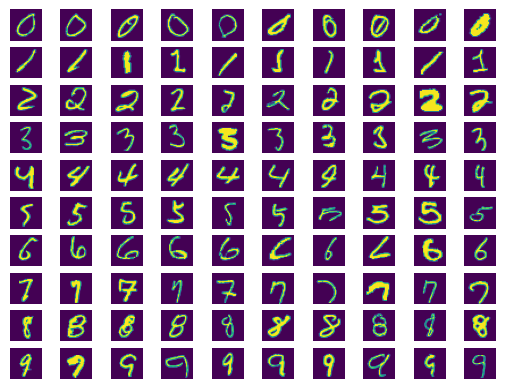

In [113]:
# Опорные вектора
fg, ax = plt.subplots(ncols=10, nrows=10)

for i in range(10):
    count = 0
    for j in indices_sup:
        if (int(y_train[j]) == i) and (count <= 9):
            count = count + 1
            ax[i, count-1].imshow(np.reshape(X_train[j], (28,28)))
            ax[i, count-1].axis('off')
        if count == 10: 
            break

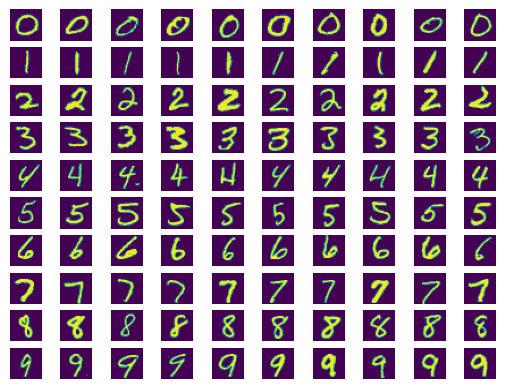

In [118]:
# Объекты не являющиеся опорными векторами
fg, ax = plt.subplots(ncols=10, nrows=10)

for i in range(10):
    count = 0
    for j in range(len(X_train)):
        flag = 0
        for s in indices_sup:
            if s == j:
                flag = 1
        
        if (int(y_train[j]) == i) and (count <= 9) and (flag == 0):
            count = count + 1
            ax[i, count-1].imshow(np.reshape(X_train[j], (28,28)))
            ax[i, count-1].axis('off')
        if count == 10: 
            break